# Microsoft Security Incident Prediction

This notebook provides a comprehensive workflow for predicting security incidents using a real-world dataset from Microsoft. The process includes:

1. **Data Acquisition**: Downloading the relevant CSV file containing cybersecurity incident data.
2. **Data Preprocessing**: Cleaning and preparing the dataset for analysis, including handling missing values, encoding categorical variables, and scaling numerical features.
3. **Data Exploration**: Exploring the dataset to gain insights into its structure, identifying patterns and correlations, and assessing the distribution of key features.
4. **Visualizations**: Creating various plots to visualize trends and relationships in the data, which helps in understanding the underlying patterns that could inform predictive models.
5. **Model Training**: Training a variety of models, both linear and non-linear, including regression-based approaches and more complex machine learning algorithms such as decision trees and ensemble methods.
6. **Results Analysis**: Evaluating model performance using standard metrics like accuracy, precision, recall, and F1 score, with a focus on understanding the trade-offs between different models and identifying the most effective approach for predicting incident severity.

This notebook aims to provide valuable insights for cybersecurity operations by leveraging machine learning techniques to predict and classify incidents based on historical data.


## Downloading the Data from Kaggle

In [65]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from kagglehub import dataset_download

def create_reduced_file(original_file_path, reduced_file_path, target_column, sample_size=10000):
    """
    Crea un archivo reducido a partir del archivo original aplicando undersampling estratificado.

    :param original_file_path: Ruta al archivo original.
    :param reduced_file_path: Ruta donde se guardará el archivo reducido.
    :param target_column: Nombre de la columna objetivo para estratificación.
    :param sample_size: Tamaño del conjunto reducido.
    """
    df_original = pd.read_csv(original_file_path)
    print(f"El archivo original tiene {len(df_original)} filas.")
    
    # Realizar undersampling estratificado
    df_reduced, _ = train_test_split(
        df_original,
        train_size=sample_size,
        stratify=df_original[target_column],
        random_state=42
    )
    
    df_reduced.to_csv(reduced_file_path, index=False)
    print(f"Archivo reducido creado con {len(df_reduced)} filas manteniendo proporciones de clases.")

# Configuración de rutas
dataset_folder = os.getcwd()
reduced_file_path = os.path.join(dataset_folder, 'microsoft_Reduced.csv')

if not os.path.exists(reduced_file_path):
    file_path = dataset_download("Microsoft/microsoft-security-incident-prediction")
    original_file_path = os.path.join(file_path, "GUIDE_Test.csv")
    
    create_reduced_file(original_file_path, reduced_file_path, target_column='IncidentGrade')
else:
    df_reduced = pd.read_csv(reduced_file_path)
    print(f"Archivo cargado con {len(df_reduced)} filas.")


Archivo cargado con 10000 filas.


Let's take a look on the columns, it's type, if it has missing values, etc.

In [66]:
df_reduced.describe(include='all')

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000,10000.000000,10000.000000,10000,4534,10000,...,280,10000.000000,10000.000000,175,1571,2398,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,9273,NaN,NaN,17,186,3,...,6,NaN,NaN,2,2,3,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,2024-06-11T22:02:45.000Z,NaN,NaN,InitialAccess,T1078;T1078.004,BenignPositive,...,Contextual,NaN,NaN,Inbound,Suspicious,Suspicious,NaN,NaN,NaN,Public
freq,NaN,NaN,NaN,NaN,28,NaN,NaN,4741,1518,4226,...,155,NaN,NaN,159,1570,1546,NaN,NaN,NaN,7019
mean,8.480207e+11,174.001700,68409.706600,4.089517e+05,NaN,98.297200,2389.946000,NaN,NaN,NaN,...,NaN,4.900000,64.681100,NaN,NaN,NaN,221.949600,1344.955300,9885.725600,NaN
std,4.903338e+11,367.429485,117319.419739,4.540566e+05,NaN,415.670435,9948.962346,NaN,NaN,NaN,...,NaN,0.698748,9.227444,NaN,NaN,NaN,65.395343,362.129106,2696.602795,NaN
min,1.840000e+02,0.000000,3.000000,0.000000e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,4.209068e+11,8.000000,421.000000,2.532625e+04,NaN,2.000000,2.000000,NaN,NaN,NaN,...,NaN,5.000000,66.000000,NaN,NaN,NaN,242.000000,1445.000000,10630.000000,NaN
50%,8.418136e+11,43.000000,9179.500000,2.279270e+05,NaN,7.000000,8.000000,NaN,NaN,NaN,...,NaN,5.000000,66.000000,NaN,NaN,NaN,242.000000,1445.000000,10630.000000,NaN
75%,1.271310e+12,172.000000,82105.750000,6.715730e+05,NaN,39.000000,97.000000,NaN,NaN,NaN,...,NaN,5.000000,66.000000,NaN,NaN,NaN,242.000000,1445.000000,10630.000000,NaN


In [67]:
df_reduced.shape

(10000, 46)

In [68]:
df_reduced.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName                int64
FolderPath

There's a balanced ammount of numerical and categorical features.

In [69]:
df_reduced.nunique()

Id                    6435
OrgId                 1061
IncidentId            6387
AlertId               9312
Timestamp             9273
DetectorId             743
AlertTitle            1863
Category                17
MitreTechniques        186
IncidentGrade            3
ActionGrouped            1
ActionGranular           2
EntityType              18
EvidenceRole             2
DeviceId               333
Sha256                 539
IpAddress             1857
Url                    631
AccountSid            2202
AccountUpn            3276
AccountObjectId       2172
AccountName           2305
DeviceName             758
NetworkMessageId      1125
EmailClusterId          87
RegistryKey             10
RegistryValueName        8
RegistryValueData        7
ApplicationId           15
ApplicationName         22
OAuthApplicationId       4
ThreatFamily            49
FileName               739
FolderPath             431
ResourceIdName           4
ResourceType             2
Roles                    6
O

We can see that features as Timestamp and AlertId has almost as much uniques values as total rows, this can idicates us that this features maybe are not needed. 

But regarding the Timestamp, we cannot delete it, maybe we can use it to do some time series predictions.

In [70]:
df_reduced.isnull().sum()

Id                       0
OrgId                    0
IncidentId               0
AlertId                  0
Timestamp                0
DetectorId               0
AlertTitle               0
Category                 0
MitreTechniques       5466
IncidentGrade            0
ActionGrouped         9997
ActionGranular        9997
EntityType               0
EvidenceRole             0
DeviceId                 0
Sha256                   0
IpAddress                0
Url                      0
AccountSid               0
AccountUpn               0
AccountObjectId          0
AccountName              0
DeviceName               0
NetworkMessageId         0
EmailClusterId        9909
RegistryKey              0
RegistryValueName        0
RegistryValueData        0
ApplicationId            0
ApplicationName          0
OAuthApplicationId       0
ThreatFamily          9937
FileName                 0
FolderPath               0
ResourceIdName           0
ResourceType          9997
Roles                 9720
O

There are some features that has null values almost as rows!, it seem like some atributes has to be deleted, because imputation.

Let's analize if we can do imputation over the missing values for each features where are missing

In [71]:
import pandas as pd

object_columns = df_reduced.select_dtypes(include=['object'])

for col in object_columns.columns:
    unique_values = object_columns[col].nunique()
    most_frequent = object_columns[col].mode()[0]  # Most frequent value
    most_frequent_count = object_columns[col].value_counts()[most_frequent]  # Number of occurrences
    missing_count = object_columns[col].isnull().sum()  # Count missing values
    print(f"Column: {col}")
    print(f"  Unique values: {unique_values}")
    print(f"  Most frequent: {most_frequent} ({most_frequent_count} occurrences)")
    print(f"  Missing values: {missing_count}")
    print()

    

Column: Timestamp
  Unique values: 9273
  Most frequent: 2024-06-11T22:02:45.000Z (28 occurrences)
  Missing values: 0

Column: Category
  Unique values: 17
  Most frequent: InitialAccess (4741 occurrences)
  Missing values: 0

Column: MitreTechniques
  Unique values: 186
  Most frequent: T1078;T1078.004 (1518 occurrences)
  Missing values: 5466

Column: IncidentGrade
  Unique values: 3
  Most frequent: BenignPositive (4226 occurrences)
  Missing values: 0

Column: ActionGrouped
  Unique values: 1
  Most frequent: ContainAccount (3 occurrences)
  Missing values: 9997

Column: ActionGranular
  Unique values: 2
  Most frequent: update stsrefreshtokenvalidfrom timestamp. (2 occurrences)
  Missing values: 9997

Column: EntityType
  Unique values: 18
  Most frequent: Ip (2193 occurrences)
  Missing values: 0

Column: EvidenceRole
  Unique values: 2
  Most frequent: Related (5535 occurrences)
  Missing values: 0

Column: ThreatFamily
  Unique values: 49
  Most frequent: CustomEnterpriseBlock

No missings for the numerical values!

In [72]:
missing_numerical = df_reduced_cleaned[numerical_columns].isnull().sum()
missing_numerical

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

### Simple Methodology for Handling Missing Values:

1. **Remove rows or columns with many missing values**:
   - If a column or row has too many missing values (e.g., more than 50%), it can be removed. This is simple and prevents the complexity of imputing values.

2. **Imputation with the mode or mean**:
   - For columns with a small number of missing values, the simplest approach is to replace the missing values with the mode (for categorical variables) or the mean (for numerical variables). This ensures that data is not lost while keeping things simple.

This methodology is effective in many cases and avoids complexity, although it may not be ideal for all situations, especially when missing data is not missing at random.


### First Approach with Missing data : DELETION

For now, let's just ignore the features where the missings rate is over 90%. And for the rest ones, we can use imputation

In [73]:
df_reduced_cleaned = df_reduced.loc[:, df_reduced.isnull().mean() < 0.5]

In [74]:
import pandas as pd

object_columns = df_reduced_cleaned.select_dtypes(include=['object'])

for col in object_columns.columns:
    unique_values = object_columns[col].nunique()
    most_frequent = object_columns[col].mode()[0]  # Most frequent value
    most_frequent_count = object_columns[col].value_counts()[most_frequent]  # Number of occurrences
    missing_count = object_columns[col].isnull().sum()  # Count missing values
    print(f"Column: {col}")
    print(f"  Unique values: {unique_values}")
    print(f"  Most frequent: {most_frequent} ({most_frequent_count} occurrences)")
    print(f"  Missing values: {missing_count}")
    print()

    

Column: Timestamp
  Unique values: 9273
  Most frequent: 2024-06-11T22:02:45.000Z (28 occurrences)
  Missing values: 0

Column: Category
  Unique values: 17
  Most frequent: InitialAccess (4741 occurrences)
  Missing values: 0

Column: IncidentGrade
  Unique values: 3
  Most frequent: BenignPositive (4226 occurrences)
  Missing values: 0

Column: EntityType
  Unique values: 18
  Most frequent: Ip (2193 occurrences)
  Missing values: 0

Column: EvidenceRole
  Unique values: 2
  Most frequent: Related (5535 occurrences)
  Missing values: 0

Column: Usage
  Unique values: 2
  Most frequent: Public (7019 occurrences)
  Missing values: 0



In [75]:
df_reduced_cleaned.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

### Transforming Categorical Values

In [76]:
print(df_reduced_cleaned.shape)
df_encoded = pd.get_dummies(df_reduced_cleaned, drop_first=True)
df_encoded.shape

(10000, 36)


(10000, 9339)

### Why One-Hot Encoding May Not Be Ideal

One-Hot Encoding can drastically increase the number of features in the dataset. In this case, applying it to categorical columns with many unique values causes the dataset to expand from 39 columns to 9,339. This can lead to several issues:

1. **Increased Dimensionality**: A massive increase in columns can cause higher computational cost, longer training times, and make models harder to interpret.

As an alternative, **Label Encoding** is more efficient, reducing the dimensionality while still transforming categorical variables into numeric values.


In [80]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_reduced_cleaned.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df_reduced_cleaned[col] = label_encoder.fit_transform(df_reduced_cleaned[col])

df_reduced_cleaned.shape

(10000, 36)

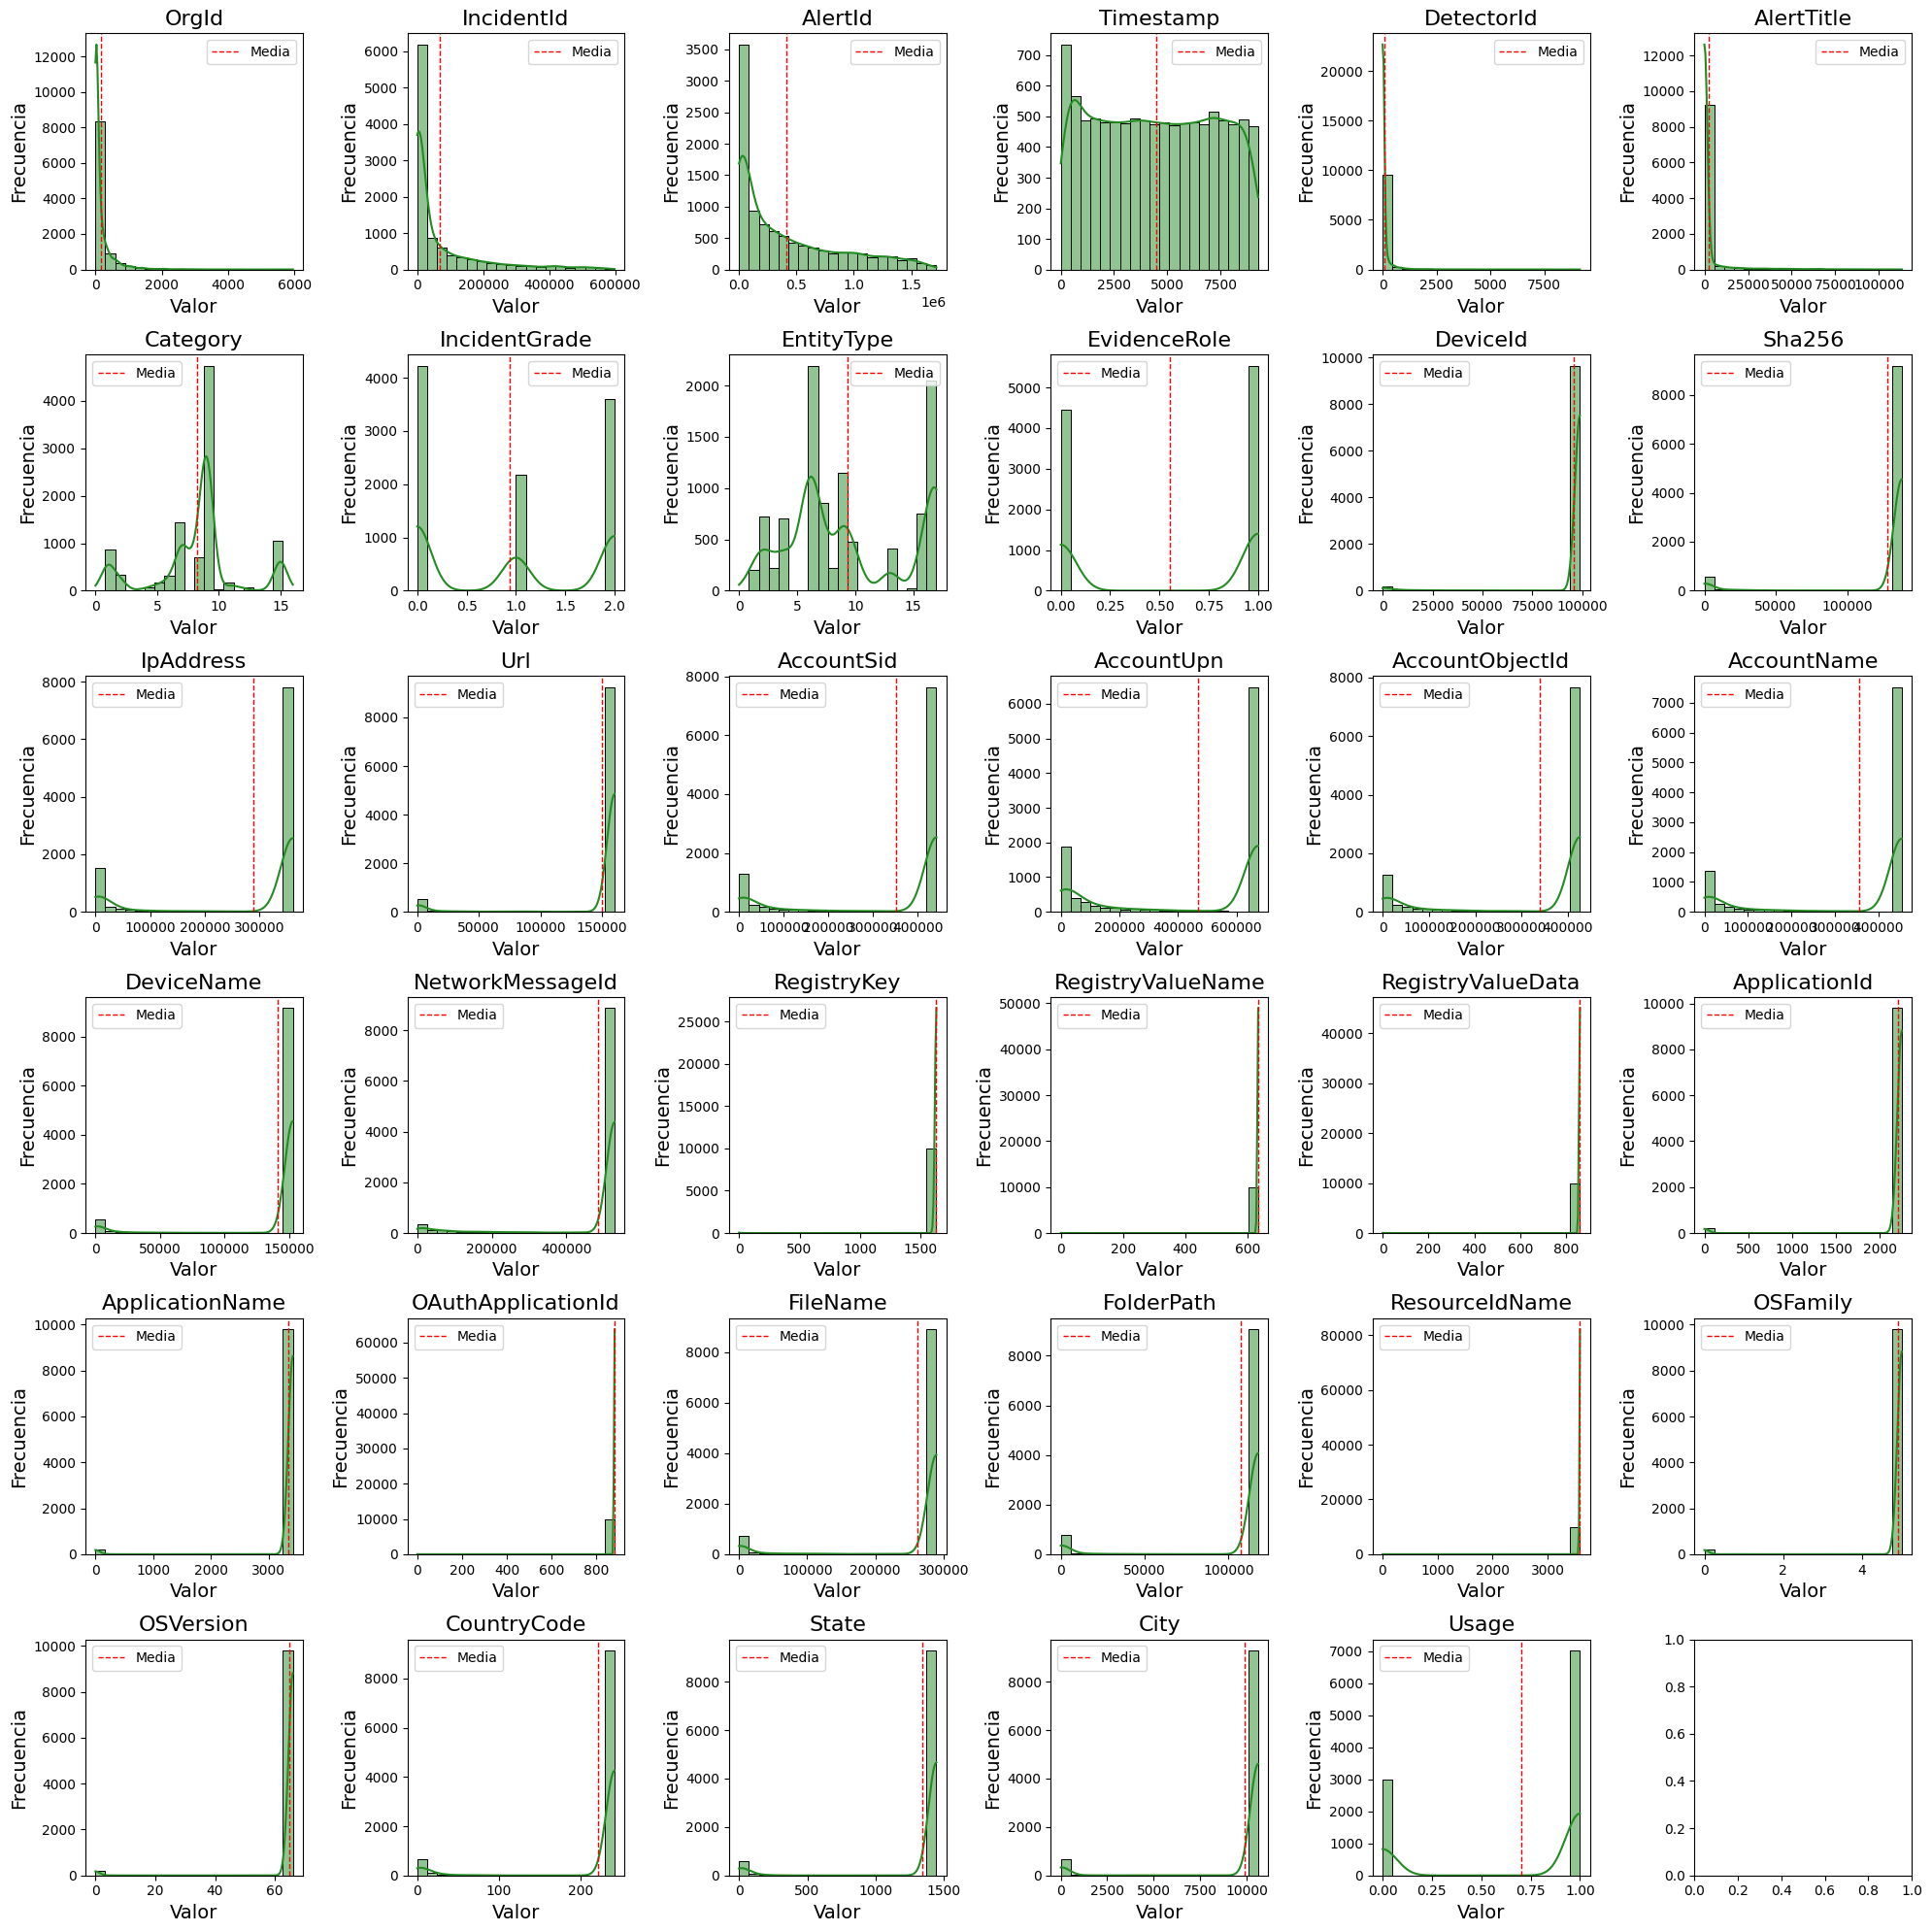

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 6, figsize=(20, 20))

for i, c in enumerate(df_reduced_cleaned.columns[1:]):  
    ax = axes.reshape(-1)[i]
    if df_reduced_cleaned[c].dtype.kind == 'O':  
        sns.countplot(x=c, data=df_reduced_cleaned, ax=ax)
    else:  
        sns.histplot(x=c, data=df_reduced_cleaned, ax=ax, bins=20, kde=True, color="forestgreen")
        ax.set_title(c, fontsize=16)
        ax.set_xlabel('Valor', fontsize=14)
        ax.set_ylabel('Frecuencia', fontsize=14)

        mean = df_reduced_cleaned[c].mean()
        median = df_reduced_cleaned[c].median()
        ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Media')
        ax.legend()

plt.tight_layout()
plt.show()


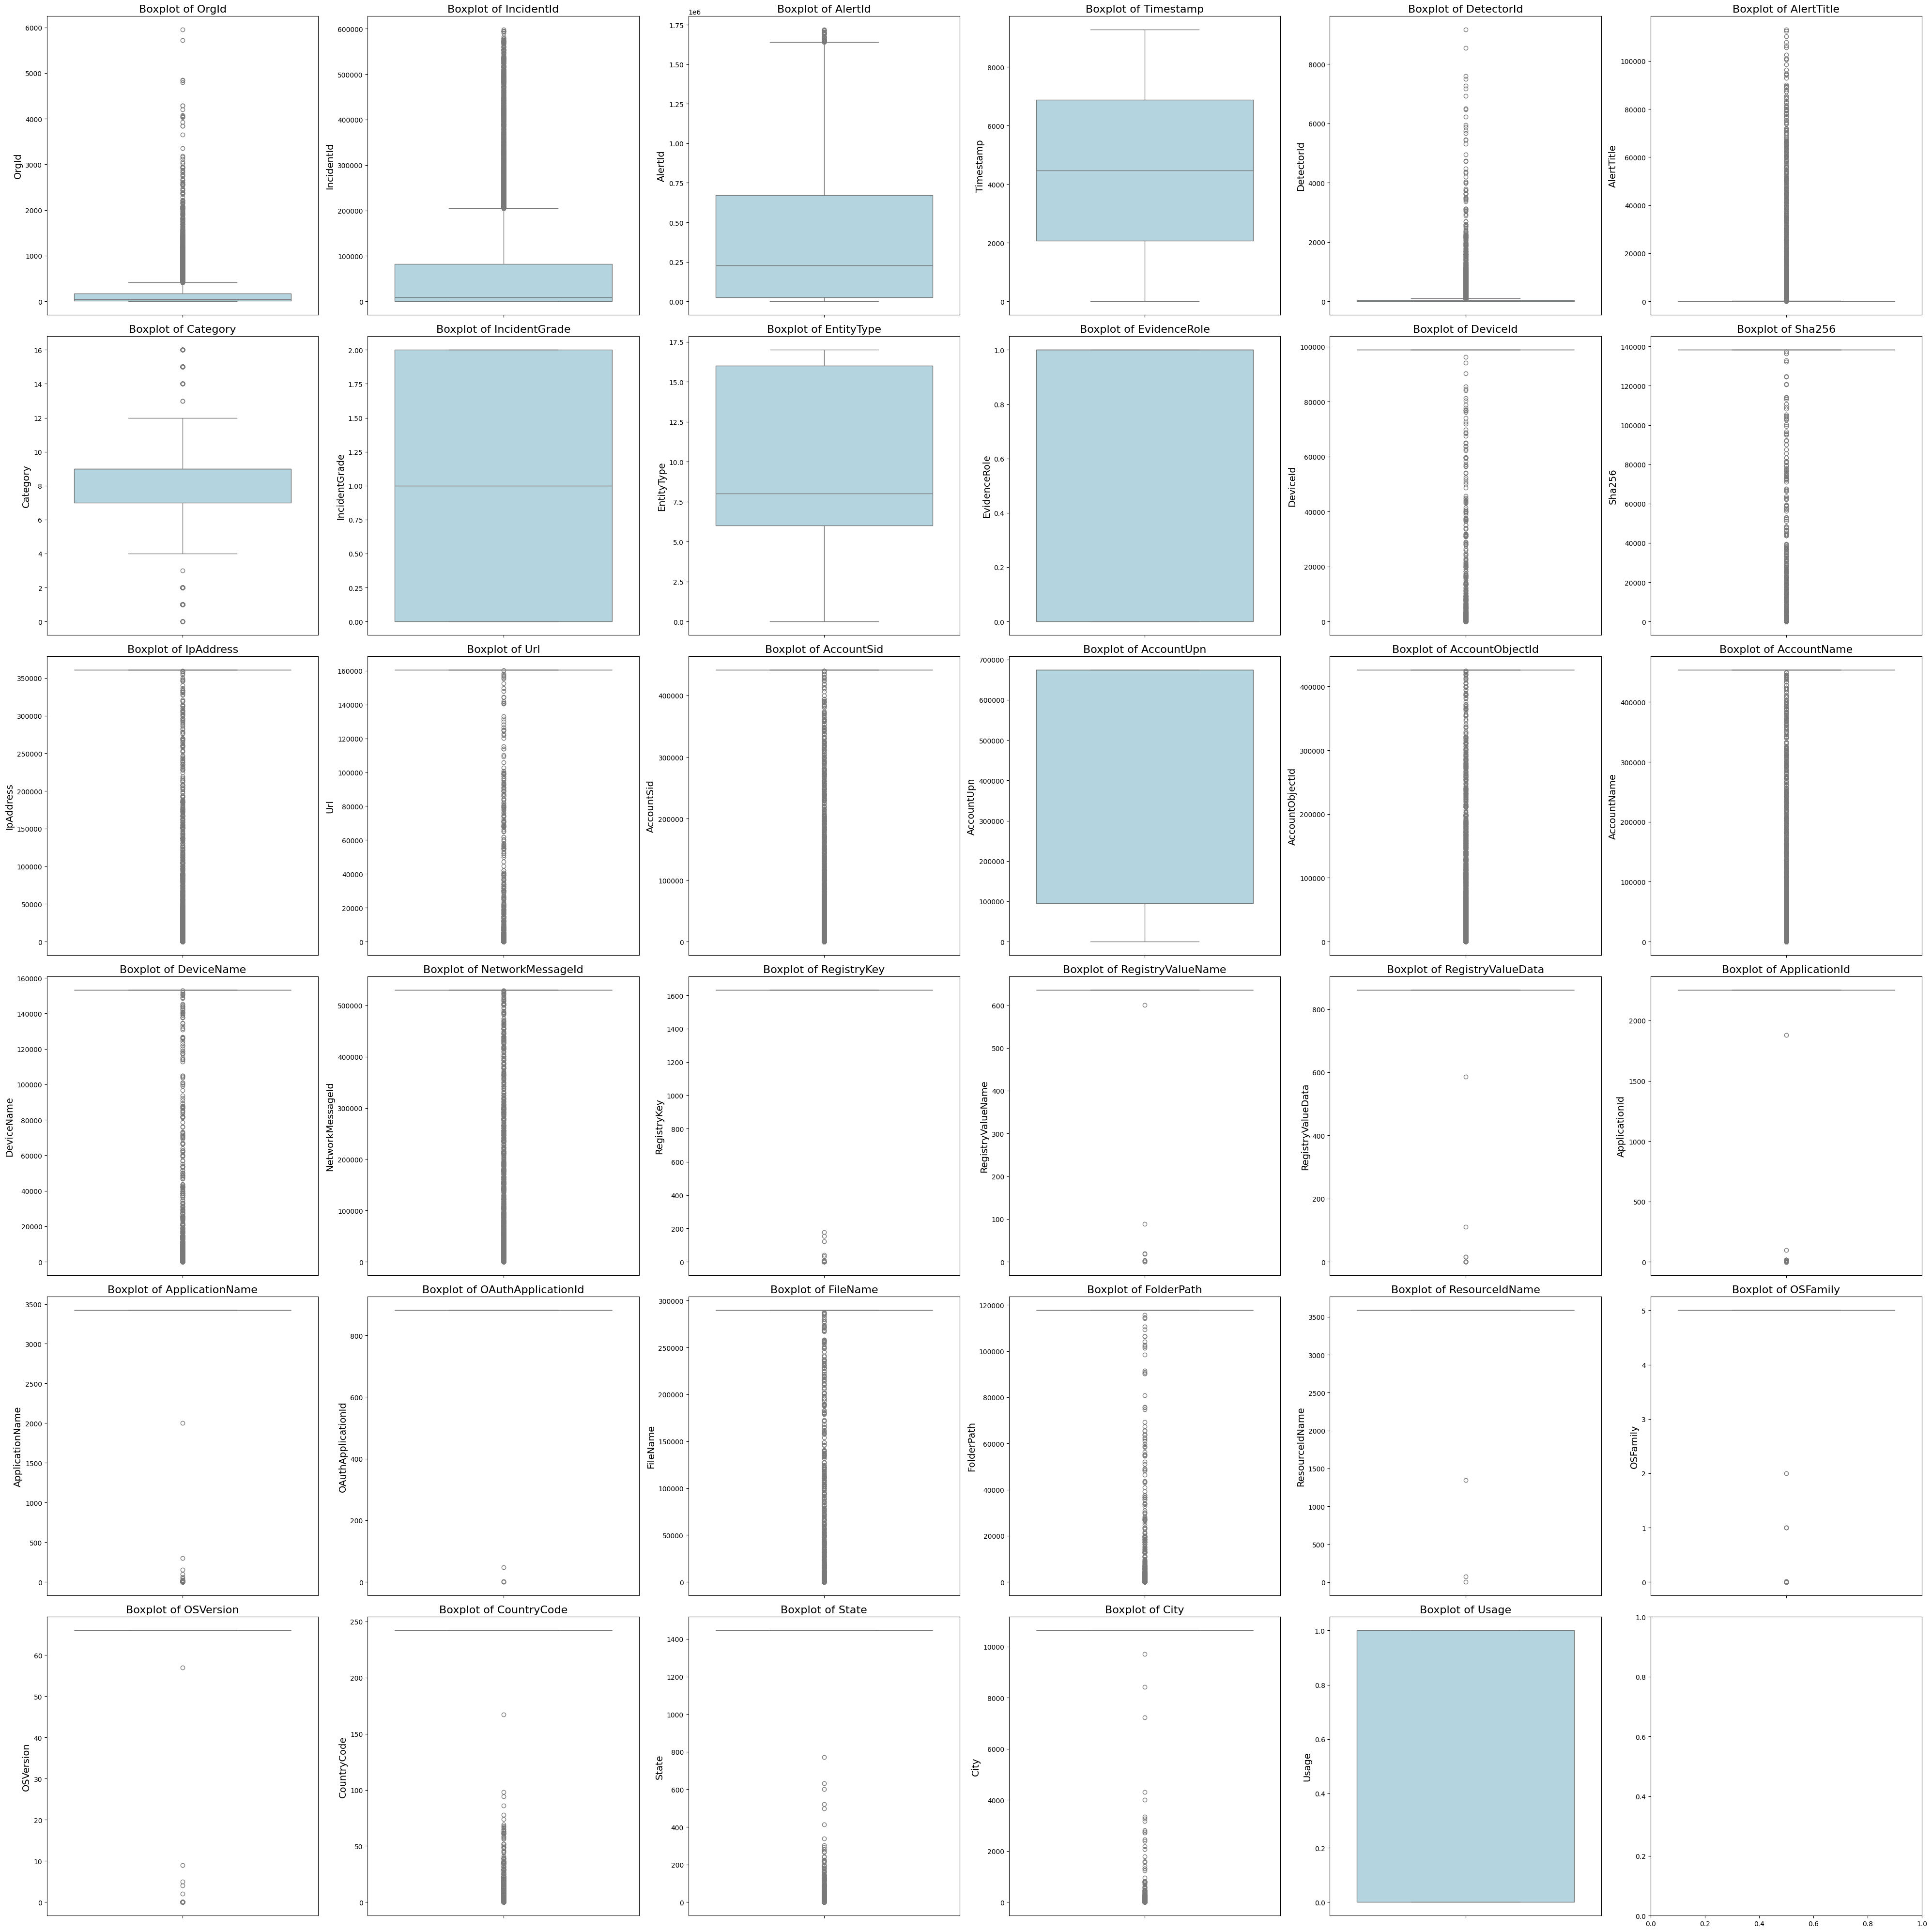

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 6, figsize=(40, 40))

for i, c in enumerate(df_reduced_cleaned.columns[1:]):  
    ax = axes.reshape(-1)[i]  
    if df_reduced_cleaned[c].dtype.kind == 'O': 
        sns.boxplot(x=c, data=df_reduced_cleaned, ax=ax)
        ax.set_title(f'Boxplot of {c}', fontsize=16)
        ax.set_xlabel(c, fontsize=14)
    else: 
        sns.boxplot(y=c, data=df_reduced_cleaned, ax=ax, color="lightblue")
        ax.set_title(f'Boxplot of {c}', fontsize=16)
        ax.set_ylabel(c, fontsize=14)

plt.tight_layout()
plt.show()
